# Chapter 3 Laboratory

## The Hot Hand

#### Find the original laboratory [here](http://openintrostat.github.io/oilabs-tidy/03_probability/probability.html)
#### Description

Basketball players who make several baskets in succession are described as having a hot hand. Fans and players have long believed in the hot hand phenomenon, which refutes the assumption that each shot is independent of the next. However, [a 1985 paper](http://www.sciencedirect.com/science/article/pii/0010028585900106) by Gilovich, Vallone, and Tversky collected evidence that contradicted this belief and showed that successive shots are independent events. This paper started a great controversy that continues to this day, as you can see by Googling hot hand basketball.

We do not expect to resolve this controversy today. However, in this lab we’ll apply one approach to answering questions like this. The goals for this lab are to (1) think about the effects of independent and dependent events, (2) learn how to simulate shooting streaks in R, and (3) to compare a simulation to actual data in order to determine if the hot hand phenomenon appears to be real.

## Getting Started

### Load packages

In this lab, we will explore and visualize the data using the `pydata` stack consisting of `numpy`, `pandas`, `matplotlib` and `seaborn`.

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from pathlib import Path

### Data

Your investigation will focus on the performance of one player: [Kobe Bryant](https://en.wikipedia.org/wiki/Kobe_Bryant) of the Los Angeles Lakers. His performance against the Orlando Magic in the [2009 NBA Finals](https://en.wikipedia.org/wiki/2009_NBA_Finals) earned him the title Most Valuable Player and many spectators commented on how he appeared to show a hot hand. The data file we’ll use is called kobe_basket.

In [7]:
kobe_path = Path("../datasets/kobe_basket.csv")
kobe_df = pd.read_csv(kobe_path)

kobe_df

,vs,game,quarter,time,description,shot
0,ORL,1,1,9:47,Kobe Bryant makes 4-foot two point shot,H
1,ORL,1,1,9:07,Kobe Bryant misses jumper,M
2,ORL,1,1,8:11,Kobe Bryant misses 7-foot jumper,M
3,ORL,1,1,7:41,Kobe Bryant makes 16-foot jumper (Derek Fisher...,H
4,ORL,1,1,7:03,Kobe Bryant makes driving layup,H
...,...,...,...,...,...,...
128,ORL,3,4,3:33,Bryant Layup Shot: Missed,M
129,ORL,3,4,2:02,Bryant 3pt Shot: Missed,M
130,ORL,3,4,00:23.9,Bryant 3pt Shot: Missed,M
131,ORL,3,4,00:06.9,Bryant 3pt Shot: Missed,M


This data frame contains 133 observations and 6 variables, where every row records a shot taken by Kobe Bryant. The `shot` variable in this dataset indicates whether the shot was a hit (`H`) or a miss (`M`).

Just looking at the string of hits and misses, it can be difficult to gauge whether or not it seems like Kobe was shooting with a hot hand. One way we can approach this is by considering the belief that hot hand shooters tend to go on shooting streaks. For this lab, we define the length of a shooting streak to be the _number of consecutive baskets made until a miss occurs_.

For example, in Game 1 Kobe had the following sequence of hits and misses from his nine shot attempts in the first quarter:

H M | M | H H M | M | M | M

You can verify this by viewing the first 9 rows of the data in the data viewer.

Within the nine shot attempts, there are six streaks, which are separated by a “|” above. Their lengths are one, zero, two, zero, zero, zero (in order of occurrence).

### Exercise 1 - What does a streak length of 1 mean, i.e. how many hits and misses are in a streak of 1? What about a streak length of 0?

A streak of length one has one hit and one miss. It indeed means that you hit once. A streak of length zero has only one and miss shot.

Counting streak lengths manually for all 133 shots would get tedious, so we’ll use the custom function `calc_streak` to calculate them, and store the results in a data frame called `kobe_streak` as the `length` variable. Let's first define such custom function.

In [8]:
def calc_streak(streak_series):
    streak_numbers = []
    current_streak = 0

    for shot in streak_series:
        if shot == "M":
            streak_numbers += [current_streak]
            current_streak = 0
        else:
            current_streak += 1

    return streak_numbers
    

Let's now define the new dataframe.

In [9]:
kobe_streak = pd.Series(calc_streak(kobe_df["shot"]))

Let's now see the distribution of streak lenghts.

[Text(0.5, 0, 'Streak length')]

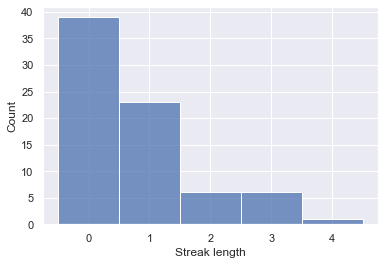

In [108]:
sns.set_theme()

ax = sns.histplot([str(ch) for ch in sorted(kobe_streak)])
ax.set(xlabel="Streak length")

### Exercise 2 - Describe the distribution of Kobe’s streak lengths from the 2009 NBA finals. What was his typical streak length? How long was his longest streak of baskets? Make sure to include the accompanying plot in your answer.

Apparently, the streak of length 0 was his most common streak, as we can see from above diagram. His longest streak is the rightmost one, of 4 hits. Let's verify this.

In [66]:
print(f"Mode is: {kobe_streak.mode().values[0]}")
print(f"Max streak is: {kobe_streak.max()}")

Mode is: 0
Max streak is: 4


## Compared to What?
We’ve shown that Kobe had some long shooting streaks, but are they long enough to support the belief that he had a hot hand? What can we compare them to?

To answer these questions, let’s return to the idea of independence. Two processes are independent if the outcome of one process doesn’t effect the outcome of the second. If each shot that a player takes is an independent process, having made or missed your first shot will not affect the probability that you will make or miss your second shot.

A shooter with a hot hand will have shots that are not independent of one another. Specifically, if the shooter makes his first shot, the hot hand model says he will have a higher probability of making his second shot.

Let’s suppose for a moment that the hot hand model is valid for Kobe. During his career, the percentage of time Kobe makes a basket (i.e. his shooting percentage) is about 45%, or in probability notation,

$$
P(shot 1 = H)=0.45
$$

If he makes the first shot and has a hot hand (not independent shots), then the probability that he makes his second shot would go up to, let’s say, 60%,

$$
P(shot 2 = H|shot 1 = H)=0.60
$$

As a result of these increased probabilities, you’d expect Kobe to have longer streaks. Compare this to the skeptical perspective where Kobe does not have a hot hand, where each shot is independent of the next. If he hit his first shot, the probability that he makes the second is still 0.45.

$$
P(shot 2 = H|shot 1 = H)=0.45
$$

In other words, making the first shot did nothing to effect the probability that he’d make his second shot. If Kobe’s shots are independent, then he’d have the same probability of hitting every shot regardless of his past shots: 45%.

Now that we’ve phrased the situation in terms of independent shots, let’s return to the question: how do we tell if Kobe’s shooting streaks are long enough to indicate that he has a hot hand? We can compare his streak lengths to someone without a hot hand: an independent shooter.

## Simulations in Python

While we don’t have any data from a shooter we know to have independent shots, that sort of data is very easy to simulate in R. In a simulation, you set the ground rules of a random process and then the computer uses random numbers to generate an outcome that adheres to those rules. As a simple example, you can simulate flipping a fair coin with the following.

In [73]:
coin_outcomes = np.array(["heads", "tails"])
np.random.choice(coin_outcomes, size=1, replace=True)

array(['heads'], dtype='<U5')

The vector `coin_outcomes` can be thought of as a hat with two slips of paper in it: one slip says `heads` and the other says `tails`. The function `np.random.choice` draws one slip from the hat and tells us if it was a head or a tail.

Run the second command listed above several times. Just like when flipping a coin, sometimes you’ll get a heads, sometimes you’ll get a tails, but in the long run, you’d expect to get roughly equal numbers of each.

If you wanted to simulate flipping a fair coin 100 times, you could either run the function 100 times or, more simply, adjust the `size` argument, which governs how many samples to draw (the `replace=True` argument indicates we put the slip of paper back in the hat before drawing again). Save the resulting vector of heads and tails in a new object called `sim_fair_coin`.

In [75]:
sim_fair_coin = np.random.choice(coin_outcomes, size=100, replace=True)

To view the results of this simulation, type the name of the object and then use `pd.value_counts` to count up the number of heads and tails.

In [76]:
pd.value_counts(sim_fair_coin)

tails    61
heads    39
dtype: int64

Since there are only two elements in coin_outcomes, the probability that we “flip” a coin and it lands heads is 0.5. Say we’re trying to simulate an unfair coin that we know only lands heads 20% of the time. We can adjust for this by adding an argument called `p`, which provides a vector of two probability weights.

In [77]:
sim_unfair_coin = np.random.choice(coin_outcomes, size=100, replace=True, p=[0.2, 0.8])

`p=[0.2, 0.8]` indicates that for the two elements in the outcomes vector, we want to select the first one, heads, with probability 0.2 and the second one, tails with probability 0.8. Another way of thinking about this is to think of the outcome space as a bag of 10 chips, where 2 chips are labeled “head” and 8 chips “tail”. Therefore at each draw, the probability of drawing a chip that says “head”" is 20%, and “tail” is 80%.

### Exercise 3 - In your simulation of flipping the unfair coin 100 times, how many flips came up heads? Include the code for sampling the unfair coin in your response. Since the markdown file will run the code, and generate a new sample each time you Knit it, you should also “set a seed” before you sample. Read more about setting a seed below.

In [78]:
# Let's set a seed for reproducibility
np.random.seed(23)

sim_unfair_coin = np.random.choice(coin_outcomes, size=100, replace=True, p=[0.2, 0.8])

pd.value_counts(sim_unfair_coin)

tails    76
heads    24
dtype: int64

In a sense, we’ve shrunken the size of the slip of paper that says “heads”, making it less likely to be drawn, and we’ve increased the size of the slip of paper saying “tails”, making it more likely to be drawn. When you simulated the fair coin, both slips of paper were the same size. This happens by default if you don’t provide a `p` argument; all elements in the `outcomes` vector have an equal probability of being drawn.

If you want to learn more about `np.random.choice` or any other function, recall that you can always check out its help file.

In [80]:
?np.random.choice

Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

.. versionadded:: 1.7.0

.. note::
    New code should use the ``choice`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if it were ``np.arange(a)``
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement. Default is True,
    meaning that a value of ``a`` can be selected multiple times.
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given, the sample assumes a uniform distribution over all
    entr

## Simulating the Independent Shooter

Simulating a basketball player who has independent shots uses the same mechanism that you used to simulate a coin flip. To simulate a single shot from an independent shooter with a shooting percentage of 50% you can type

In [81]:
shot_outcomes = np.array(["H", "M"])
sim_basket = np.random.choice(shot_outcomes, size=1, replace=True)

To make a valid comparison between Kobe and your simulated independent shooter, you need to align both their shooting percentage and the number of attempted shots.

### Exercise 4 - What change needs to be made to the sample function so that it reflects a shooting percentage of 45%? Make this adjustment, then run a simulation to sample 133 shots. Assign the output of this simulation to a new object called sim_basket.

We need to add the `p` argument to show the probabilities of `H` and `M` respectively.

In [91]:
sim_basket = np.random.choice(shot_outcomes, size=133, replace=True, p=[0.45, 0.55])

## More Practice

## Comparing Kobe Bryant to the Independent Shooter

### Exercise 5 - Using calc_streak, compute the streak lengths of sim_basket, and save the results in a data frame called sim_streak.

In [92]:
sim_streak = calc_streak(sim_basket)

### Exercise 6 - Describe the distribution of streak lengths. What is the typical streak length for this simulated independent shooter with a 45% shooting percentage? How long is the player’s longest streak of baskets in 133 shots? Make sure to include a plot in your answer.

Let's plot the distribution and check all the statistics including the `max` and the `mode`.

Mode is: 0
Max is: 6


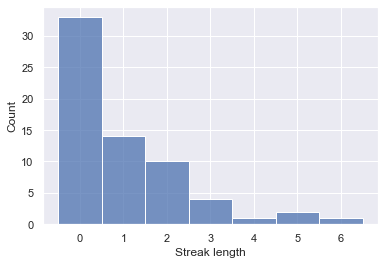

In [109]:
print(f"Mode is: {pd.Series(sim_streak).mode().tolist()[0]}")
print(f"Max is: {pd.Series(sim_streak).max()}")

ax = sns.histplot([str(ch) for ch in sorted(sim_streak)])

_ = ax.set(xlabel="Streak length")

While the mode is similar (i.e. the most common streak length is still 0), the max streak length slightly varies, even though the distribution follows a quite similar pattern.

### Exercise 7 - If you were to run the simulation of the independent shooter a second time, how would you expect its streak distribution to compare to the distribution from the question above? Exactly the same? Somewhat similar? Totally different? Explain your reasoning.

I would expect a similar distribution, not the same in any way though. After all, sampling 133 shots given the probabilities, we will get approximately 45% of hits and 55% of misses.

### Exercise 8 - How does Kobe Bryant’s distribution of streak lengths compare to the distribution of streak lengths for the simulated shooter? Using this comparison, do you have evidence that the hot hand model fits Kobe’s shooting patterns? Explain.

I don't think the hot hand model fits Kobe's shooting pattern since the random shooter was able to have a longer streak that Kobe, and this means that each shot is basically independent from each other. Of course, mood can have a significan influence in each shot, but it's definitely not the previous shot to tell the probability of this current shot. Another visual clue is the shape of the two histograms: they're pretty much the same.